In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.multicomp as multi
from dataFilter import Replacing

df = pd.read_excel("D:\ForPy\Git\DANO_NN_2024\Data\hakaton_nn_1month.xlsx")
Replacing(df)


<>:9: SyntaxWarning: invalid escape sequence '\F'
<>:9: SyntaxWarning: invalid escape sequence '\F'
C:\Users\dukeo\AppData\Local\Temp\ipykernel_7796\2953415459.py:9: SyntaxWarning: invalid escape sequence '\F'
  df = pd.read_excel("D:\ForPy\Git\DANO_NN_2024\Data\hakaton_nn_1month.xlsx")
d:\ForPy\Git\DANO_NN_2024\Code\Project\dataFilter.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gear_type"] = df["gear_type"].replace("Механическая",0)


In [17]:
df["offencedata"] = pd.to_datetime(df["offencedate"])
df["gender_cd"] = df["gender_cd"].replace("M",1)
df["gender_cd"] = df["gender_cd"].replace(";M",1)
df["gender_cd"] = df["gender_cd"].replace("F",0)
df["children_cnt"] = df["children_cnt"].fillna(0)



     offencedata  gender  children  auto_year car price  income   power   age  \
0     2024-05-15       1       0.0     2011.0       712    80.0  152.00  23.0   
1     2024-05-13       1       0.0     2011.0       162    45.0   73.00  19.0   
2     2024-05-10       1       0.0     2018.0      2601   500.0  145.00  43.0   
3     2024-05-02       1       0.0     2007.0       410    35.0  150.00  27.0   
4     2024-04-28       0       0.0     2004.0       617    50.0  155.00  42.0   
...          ...     ...       ...        ...       ...     ...     ...   ...   
7995  2024-05-08       0       0.0     2016.0       917    39.0  110.00  58.0   
7996  2024-05-15       1       0.0     1999.0       549   100.0  156.00  36.0   
7997  2024-05-24       1       0.0     2004.0       552   110.0  163.00  35.0   
7998  2024-05-11       1       0.0     2013.0      1424     NaN  148.00  33.0   
7999  2024-05-09       1       0.0     2019.0      1915    50.0  150.00  26.0   

     martial_status  
0    

<Figure size 1000x800 with 0 Axes>

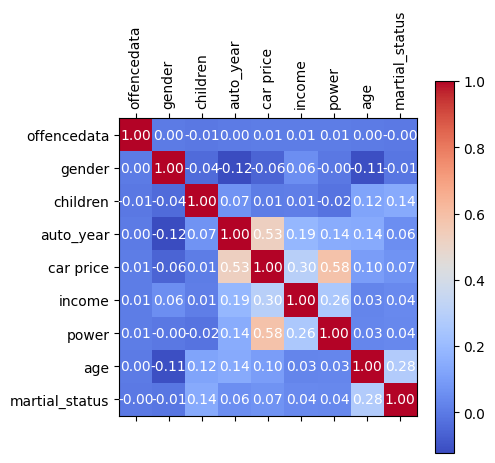

In [30]:
df["offencedata"] = pd.to_datetime(df["offencedate"])
df["gender_cd"] = df["gender_cd"].replace("M",1)
df["gender_cd"] = df["gender_cd"].replace(";M",1)
df["gender_cd"] = df["gender_cd"].replace("F",0)
df["gender_cd"] = df["gender_cd"].fillna(0)
df["children_cnt"] = df["children_cnt"].fillna(0)
df["gender_cd"] = df["gender_cd"].astype("int64")
df["gear_type"] = df["gear_type"].replace("Автоматическая",1)
df["gear_type"] = df["gear_type"].replace("Механическая",0)
df["marital_status_cd"] = df["marital_status_cd"].replace("MAR",2)
df["marital_status_cd"] = df["marital_status_cd"].replace("DIV",0)
df["marital_status_cd"] = df["marital_status_cd"].replace("UNM",-1)
df["marital_status_cd"] = df["marital_status_cd"].replace("WID",0)
df["marital_status_cd"] = df["marital_status_cd"].replace("CIV",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Движение по обочине",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Превышение скорости на 20-40 км/ч",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Превышение скорости на 40-60 км/ч",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Нарушение разметки",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Поворот (разворот) в запрещенном месте",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Не пристегнут ремень безопасности",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Проезд на красный сигнал светофора",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Движение по выделенной полосе (Москва и Санкт-Петербург)",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Движение по обочине",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Использование телефона за рулем",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Выезд на велосипедную или пешеходную дорожку",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Движение по выделенной полосе (Москва и Санкт-Петербург)",1)



data_to_corr = pd.DataFrame({"offencedata":df["offencedata"][:8000],
                             "gender":df["gender_cd"][:8000],
                             "children": df["children_cnt"][:8000],
                             "auto_year": df["auto_year"][:8000],
                             "car price": df["car_price"][:8000],
                             "income":df["person_monthly_income_amt"][:8000],
                             "power" : df["engine_power"][:8000],
                             "age": df["age"][:8000],
                             "martial_status":df["marital_status_cd"][:8000]})

print(data_to_corr)

corr_matrix = data_to_corr.corr()
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap="coolwarm")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns , rotation="vertical")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="w")
 
plt.show()

<Axes: xlabel='region', ylabel='Count'>

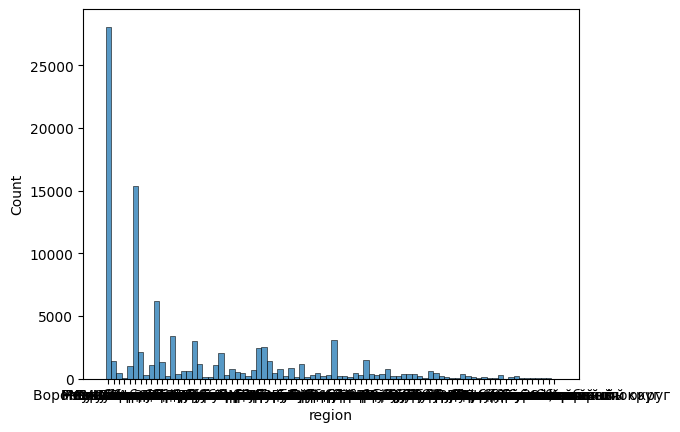

In [32]:
sns.histplot(df["region"])


<Axes: xlabel='day_of_week', ylabel='Count'>

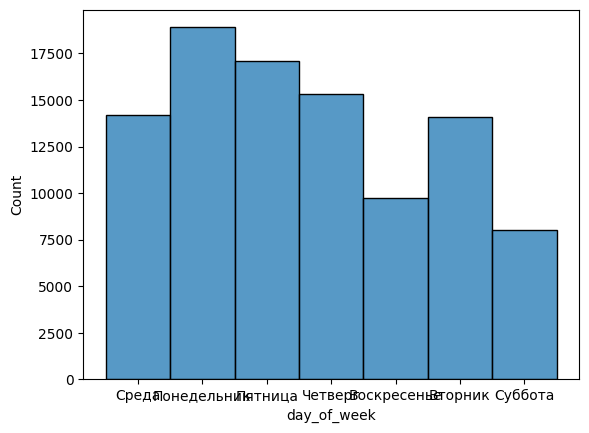

In [ ]:
sns.histplot(df["day_of_week"])

<Axes: xlabel='offenceshortstatement', ylabel='Count'>

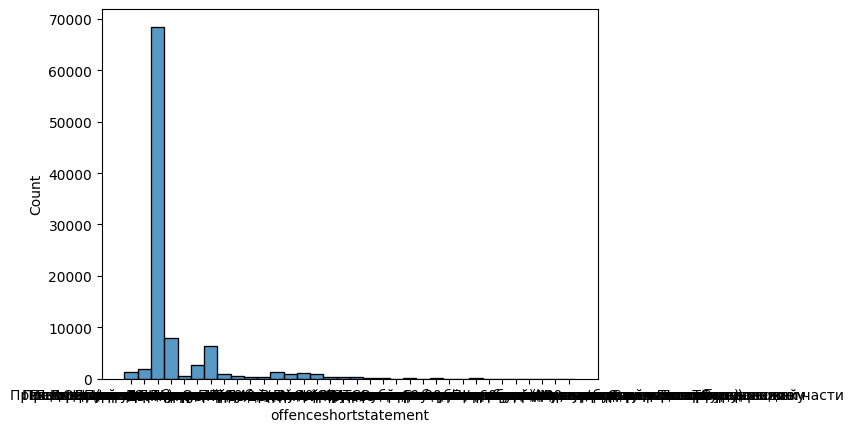

In [39]:
sns.histplot(df["offenceshortstatement"])

<Axes: xlabel='age', ylabel='Count'>

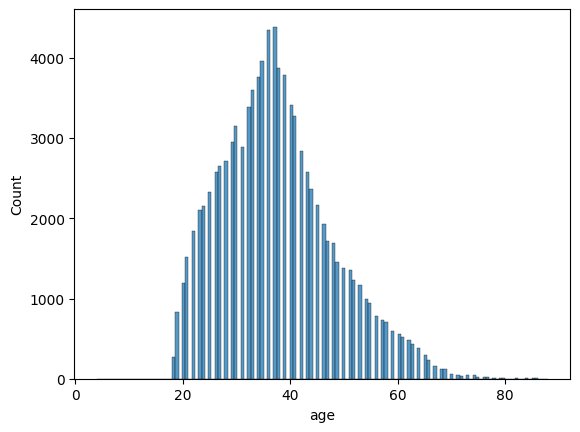

In [40]:
sns.histplot(df["age"])

<Axes: >

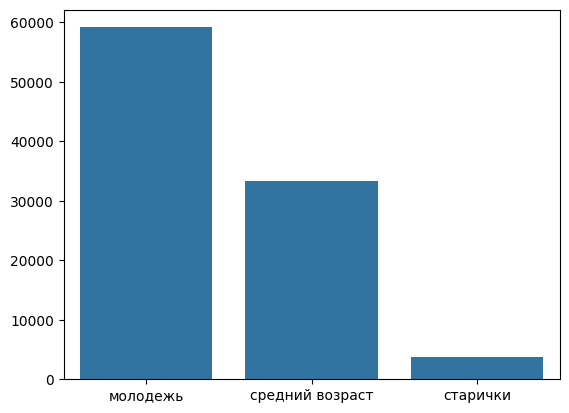

In [51]:
sns.barplot({"молодежь":len(df[(df["age"]>=20) & (df["age"] < 40)]),"средний возраст":len(df[(df["age"]>=40) & (df["age"] < 60)]),"старички":len(df[(df["age"]>=60)])})

<Axes: >

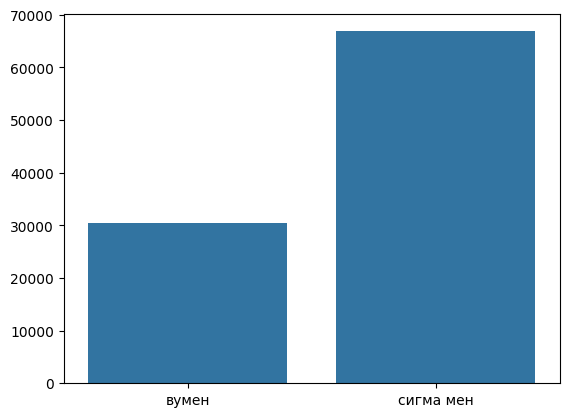

In [52]:
sns.barplot({"вумен":len(df[df["gender_cd"] == 0]),"сигма мен":len(df[df["gender_cd"] == 1])})

<Axes: >

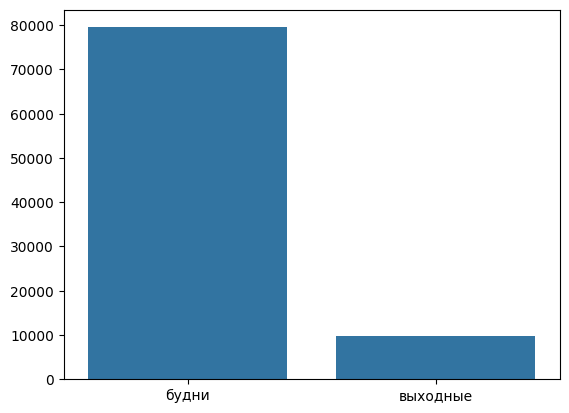

In [54]:
weekends = len(df[df["day_of_week"]=="Субота"]) + len(df[df["day_of_week"]=="Воскресенье"])
not_weekends = len(df[df["day_of_week"]=="Понедельник"]) + len(df[df["day_of_week"]=="Вторник"]) + len(df[df["day_of_week"]=="Среда"]) + len(df[df["day_of_week"]=="Четверг"]) + len(df[df["day_of_week"]=="Пятница"]) 


sns.barplot({"будни":not_weekends,"выходные":weekends})